In [1]:
target = 6

In [2]:
from os import listdir
from os.path import abspath, join, isdir, isfile

path = f"./../datasets/SIGGI/targets/{target}"
print("The SIGGI dataset is located in " + abspath(path) + ". Directory content:\n")

content = sorted(listdir(path))
directories = [directory for directory in content if isdir(join(path, directory))]

for directory in directories:
    if not directory.startswith('.'):
        print(directory)
        subcontent = sorted(listdir(join(path, directory)))
        for file in subcontent:
            subdirectory_path = join(path, directory, file)
            if isdir(subdirectory_path):
                num_files = len([f for f in listdir(subdirectory_path) if isfile(join(subdirectory_path, f))])
                print('├──' + file + f"    <-- contains {num_files} files") if not file.startswith('.') else None

The SIGGI dataset is located in /home/jovyan/datasets/SIGGI/targets/6. Directory content:

images
├──train    <-- contains 480 files
├──val    <-- contains 120 files
labels
├──train    <-- contains 480 files
├──val    <-- contains 120 files


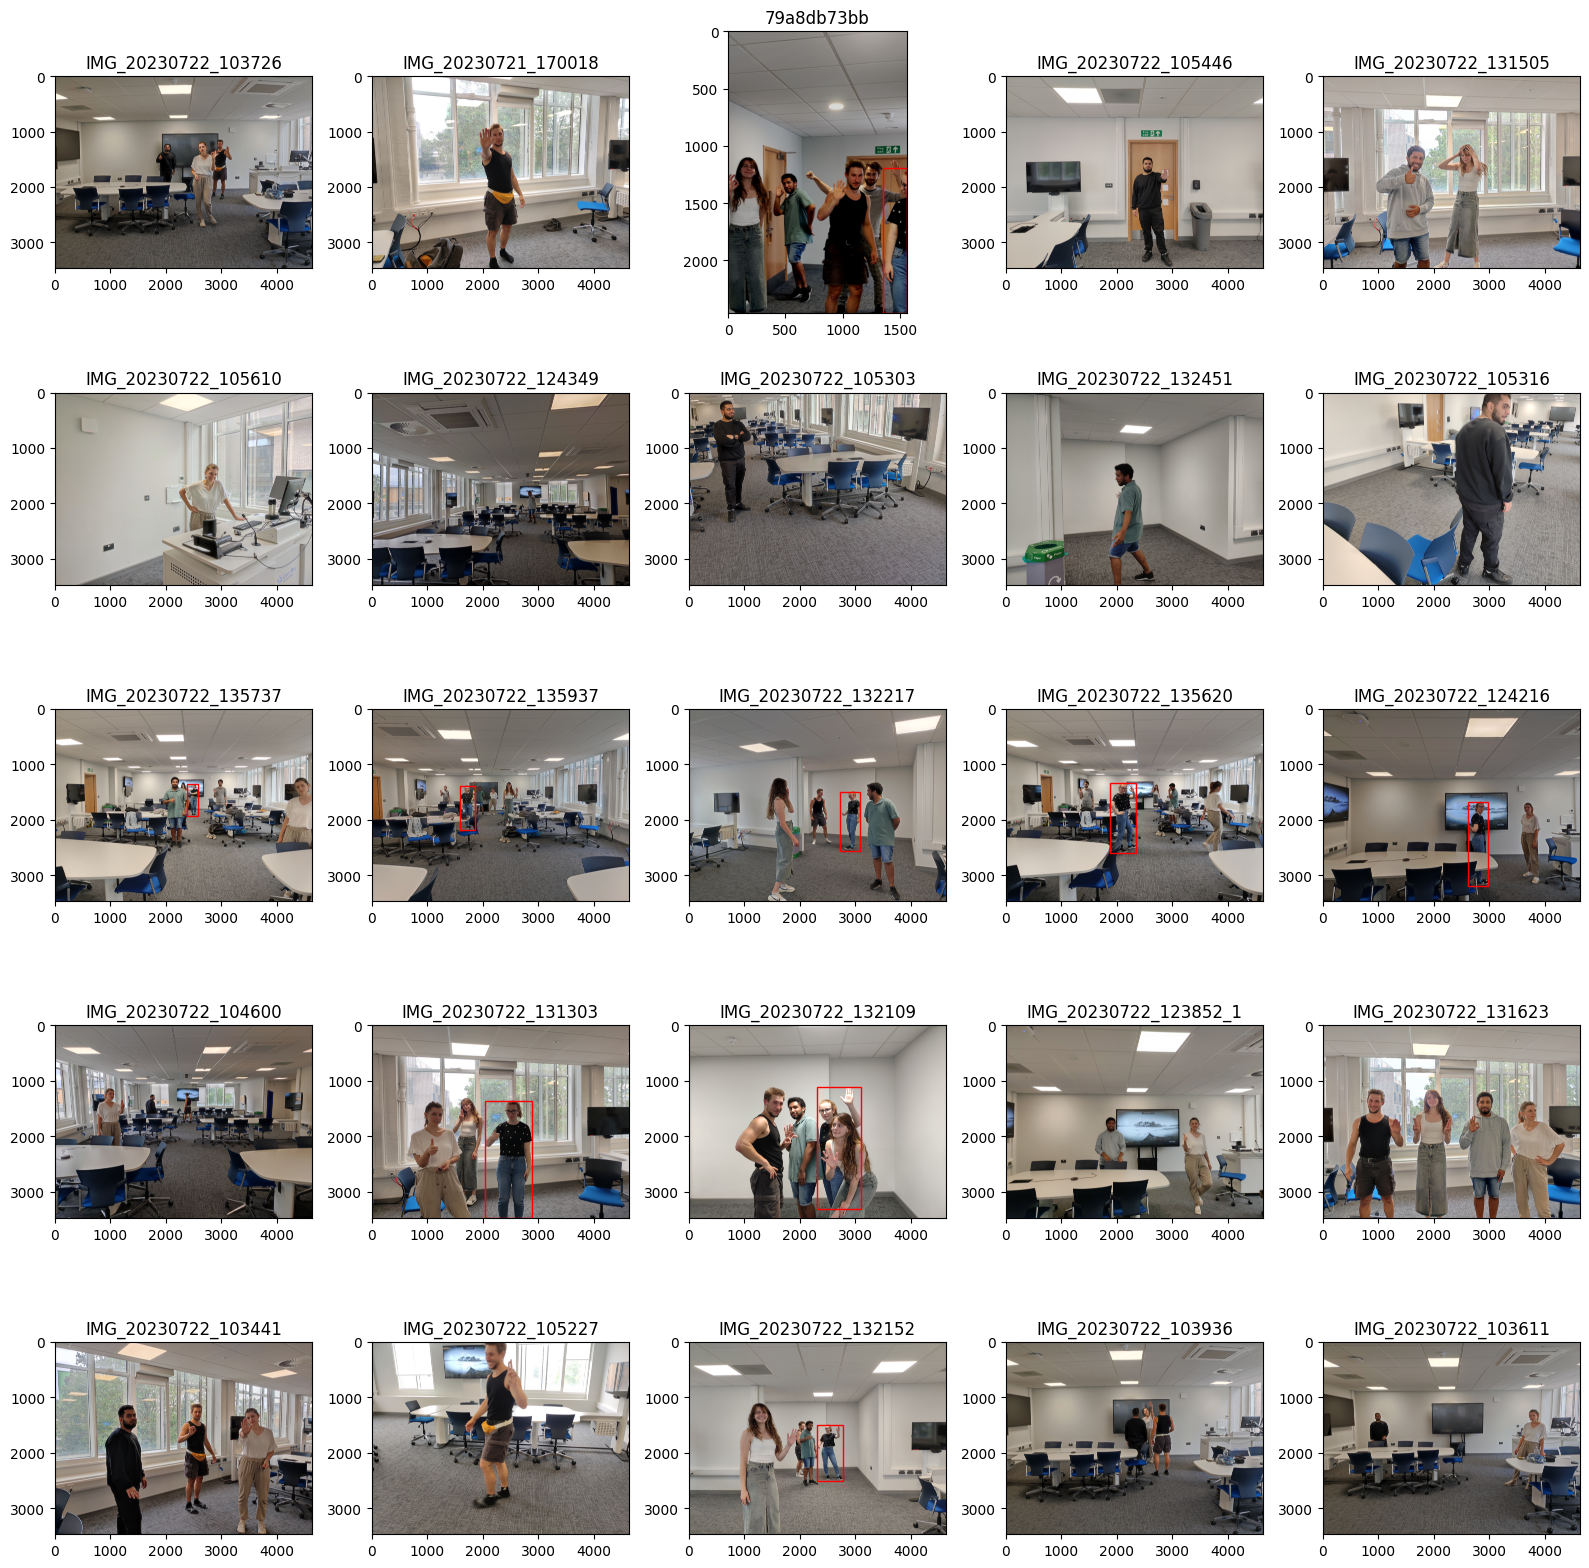

In [3]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd

# Set paths to the image and label directories
images_dir = f"./../datasets/SIGGI/targets/{target}/images"
labels_dir = f"./../datasets/SIGGI/targets/{target}/labels"

# Subdirectories for training and validation
train_images_dir = os.path.join(images_dir, "train")
val_images_dir = os.path.join(images_dir, "val")
train_labels_dir = os.path.join(labels_dir, "train")
val_labels_dir = os.path.join(labels_dir, "val")

def get_image_paths_and_labels(images_dir, labels_dir):
    image_paths = [os.path.join(images_dir, f) for f in os.listdir(images_dir) if f.endswith('.jpg')]
    label_paths = [os.path.join(labels_dir, f[:-4] + '.txt') for f in os.listdir(images_dir) if f.endswith('.jpg')]
    return image_paths, label_paths

# Get image paths and label paths
train_image_paths, train_label_paths = get_image_paths_and_labels(train_images_dir, train_labels_dir)
val_image_paths, val_label_paths = get_image_paths_and_labels(val_images_dir, val_labels_dir)

# Sample random images
random_train_images = random.sample(train_image_paths, 20)
random_val_images = random.sample(val_image_paths, 5)

# Combine the samples
random_images = random_train_images + random_val_images

# Create a plot with 5x5 subplots
fig, axs = plt.subplots(5, 5, figsize=(16, 16))

# Plot each image with bounding boxes
for i, ax in enumerate(axs.flatten()):
    img_path = random_images[i]
    img_id = os.path.splitext(os.path.basename(img_path))[0]
    label_path = os.path.join(
        train_labels_dir if 'train' in img_path else val_labels_dir,
        img_id + '.txt'
    )

    # Load the image
    im = plt.imread(img_path)
    ax.imshow(im)

    # Get image dimensions
    img_width = im.shape[1]
    img_height = im.shape[0]

    # Load the bounding boxes
    if os.path.exists(label_path):
        img_boxes = pd.read_csv(label_path, sep=' ', header=None, names=['class', 'x_center', 'y_center', 'width', 'height'])

        # Draw bounding boxes
        for _, row in img_boxes.iterrows():
            class_, x_center, y_center, width, height = row
            x_min = (x_center - width / 2) * img_width
            y_min = (y_center - height / 2) * img_height
            rect = patches.Rectangle(
                (x_min, y_min), width * img_width, height * img_height,
                linewidth=1, edgecolor='r', facecolor='none'
            )
            ax.add_patch(rect)

    ax.set_title(img_id)

plt.tight_layout()
plt.show()


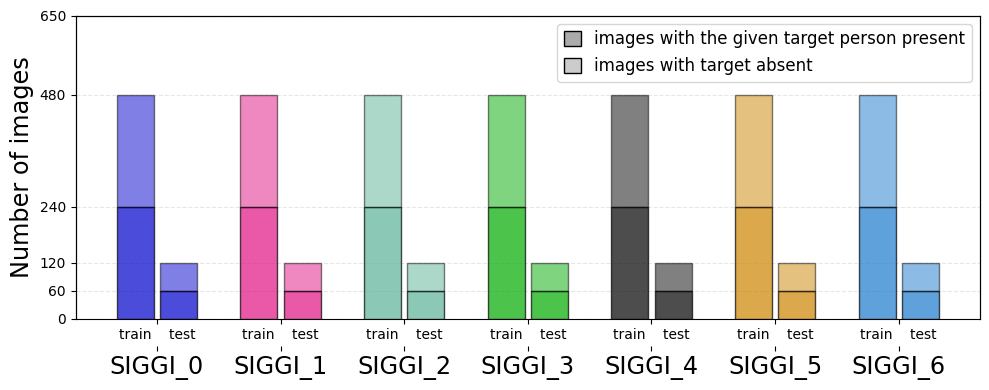

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches


# Data setup
categories = ['SIGGI_0', 'SIGGI_1', 'SIGGI_2', 'SIGGI_3', 'SIGGI_4', 'SIGGI_5', 'SIGGI_6']
train_height = 480
test_height = 120
colors = ['#0000FF', '#FF1493', '#66CDAA', '#00FF00', '#030303', '#FFA500', '#1E90FF']
colors = ['#0000CC', '#E01282', '#5AB397', '#00CC00', '#020202', '#CC8400', '#1A7ACC']
target_color = '#ababab'
empty_color = '#cccccc'
alpha = 1.0

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 4))

# Bar width
bar_width = 0.6
bar_positions = np.arange(len(categories)*2)
bars_space = 0.1

# Texture hatch patterns
# hatch_patterns = ['/', '\\', '|', '-', '+', 'x', 'o']
hatch = '/'

# Plotting train bars
for i, (category, color) in enumerate(zip(categories, colors)):
    # alpha = 0.7 if i == 0 or i == 4 else 1.0
    alpha = 0.7
    bar_color='black'
    color = '#00ab00' if i==3 else color
    ax.bar(bar_positions[i]*2 - bar_width/2 - bars_space/2, train_height/2, width=bar_width, color=color, zorder=3, edgecolor=bar_color, linewidth=1, alpha=alpha)
    bar_color='black'
    alpha = 0.5
    ax.bar(bar_positions[i]*2 - bar_width/2 - bars_space/2, train_height/2, width=bar_width, bottom=train_height/2, color=color, zorder=3, edgecolor=bar_color, linewidth=1, alpha=alpha)

for i, (category, color) in enumerate(zip(categories, colors)):
    # alpha = 0.7 if i == 0 or i == 4 else 1.0
    alpha = 0.7
    bar_color='black'
    color = '#00ab00' if i==3 else color
    ax.bar(bar_positions[i]*2 + bar_width/2 + bars_space/2, test_height/2, width=bar_width, color=color, zorder=3, edgecolor=bar_color, linewidth=1, alpha=alpha)
    bar_color='black'
    alpha = 0.5
    ax.bar(bar_positions[i]*2 + bar_width/2 + bars_space/2, test_height/2, width=bar_width, bottom=test_height/2, color=color, zorder=3, edgecolor=bar_color, linewidth=1, alpha=alpha)
    
# Create legend handles
legend_handles = []

# Target present patch with hatch and edge color
target_patch = mpatches.Patch(facecolor=target_color, edgecolor='black', label='images with the given target person present')
legend_handles.append(target_patch)

# Empty patch with white face color and edge color
empty_patch = mpatches.Patch(facecolor=empty_color, edgecolor='black', label='images with target absent')
legend_handles.append(empty_patch)

# Add legend with custom handles
legend = ax.legend(handles=legend_handles, fontsize='large', title_fontsize='large', loc='upper right', handlelength=1.0, handleheight=1.0)
legend.get_title().set_color('black')



# Setting labels and ticks
ax.set_xticks(np.arange(len(categories))*2)
ax.set_xticklabels(['train    test'] * len(categories))
ax.tick_params(axis='x', labelsize='medium')
ax.set_ylabel('Number of images')

# Set secondary xticks and xticklabels
ax2 = ax.twiny()
ax2.set_xticks(np.arange(len(categories))*2)
ax2.set_xticklabels(categories)

# Adjust the position of the secondary x-axis
ax2.set_xlim(ax.get_xlim())
ax2.xaxis.set_ticks_position('bottom')
ax2.spines['bottom'].set_position(('outward', 20))  # Adjust the offset as needed 
ax2.spines['bottom'].set_linewidth(0)    # Set the linewidth to 0 to effectively hide the spine

# for label, color in zip(ax2.get_xticklabels(), colors):
#     label.set_color(color)

    
    


# Adding gridlines and title
ax.set_yticks([0, 60, 120, 240, 480, 650])
ax.grid(axis='y', linestyle='--', alpha=0.3)

# ax3 = ax.twinx()
# ax3.set_yticks([60, 240, 650])
# ax3.grid(axis='y', linestyle='--', alpha=0.3)
# ax2.yaxis.set_ticks_position('left')
# ax2.spines['left'].set_position(('outward', 20))  # Adjust the offset as needed 
# ax2.spines['left'].set_linewidth(0)

plt.rcParams.update({
    'font.size': 10,          # Default font size
    'axes.labelsize': 'xx-large',# Axes labels size
    'legend.fontsize': 'medium',# Legend font size
    'xtick.labelsize': 'xx-large',# X-axis tick label size
    'ytick.labelsize': 'medium',# Y-axis tick label size
})

# Adjust layout and display plot
plt.tight_layout()
plt.show()
